1. **Domain Exploration**
    - understanding the business process, understand the data sources
    - understand common beleifs with in the business
    

2. **Data Collection and Data Exploration**
    - collect data from multiple sources
    - form a dataset, perform generic exploration to understand data quality


3. **Data Cleaning**
    - Handle duplicate entries
    - Handle unwanted cols
    - Handling missing values
    - Handling outliers


4. **Feature Engineering**
    - Feature Extraction
    - Feature Selection
        - **Data VIsualization**
            - Univariate analysis
            - Bivariate analysis
            - Multivarite analysis

        - **Statistical Research**
            - Correlation Analysis
            - ANOVA
            - Chi Square

5. **Preprocessing features**
    - Encoding
    - Normalization
    - train test split
    
6. Apply Machine Learning -
    - choose the appropriate algorithm, develop a predictive model
    
7. Performance ANalysis
8. Optimization & Tuning
9. Deploy the model to production
10. Monitor the performance in production

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 2. Data Exploration

In [2]:
df = pd.read_csv(r"E:\MLIoT\ML\dataset\combined_cycle_power_plant.csv")
df.shape

(9568, 5)

In [3]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## 3. Data Cleaning

In [6]:
# check for duplicates
df.duplicated().sum()

41

In [7]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(9568, 5)
(9527, 5)


In [8]:
# check for missing values
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [9]:
# check for outliers
df.skew()

AT   -0.136107
V     0.196819
AP    0.273846
RH   -0.435138
PE    0.305791
dtype: float64

## 4. Feature Engineering
    - Feature Selection

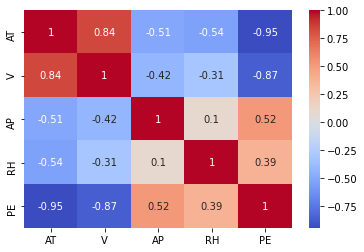

In [10]:
cor = df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [11]:
x = df[['AT','V','AP','RH']]
y = df['PE']

In [12]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [13]:
y.head()

0    480.48
1    445.75
2    438.76
3    453.09
4    464.43
Name: PE, dtype: float64

## 5. Preprocessing of features

### train test split

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(9527, 4)
(7621, 4)
(1906, 4)
(9527,)
(7621,)
(1906,)


In [15]:
xtrain.head()

,AT,V,AP,RH
5529,24.24,70.32,1009.38,82.83
5813,22.73,43.79,1015.61,42.66
3533,12.24,44.90,1020.31,82.22
1069,15.79,38.28,1014.40,74.84
8967,7.00,41.55,1001.43,97.12


In [16]:
ytrain.head()

5529    436.45
5813    460.20
3533    464.25
1069    465.64
8967    483.92
Name: PE, dtype: float64

## 6. Applying ML - linear regression

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
# train the model using train dataset
model.fit(xtrain,ytrain)

LinearRegression()

In [19]:
model.coef_,model.intercept_

(array([-1.97024592, -0.23589455,  0.06101361, -0.15628   ]),
 455.49096189600937)

In [20]:
newdata = [[19.07,49.69,1007.22,76.79]]
model.predict(newdata)

array([455.65016027])

## 7. Performance Analysis

In [21]:
from sklearn import metrics

In [22]:
# check r2 score for test data - xtest,ytest

# get predictions for test data
ypred = model.predict(xtest)

In [23]:
metrics.r2_score(ytest,ypred)

0.9286769219658513

In [24]:
metrics.mean_absolute_error(ytest,ypred)

3.674405197758463

## 8. Export model for production

In [25]:
import joblib

In [27]:
joblib.dump(model,"deployment/ccpp_model.pkl")

['deployment/ccpp_model.pkl']